In [2]:
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation


In [3]:
stop_words = sorted(['acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz', 'bu', 'çok', 'çünkü', 'da', 'daha', 'de', 'defa', 'diye', 'eğer', 'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise', 'kez', 'ki', 'kim', 'mı', 'mu', 'mü', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 'niye', 'o', 'sanki', 'şey', 'siz', 'şu', 'tüm', 've', 'veya', 'ya', 'yani', 'bir', 'için', 'olan', 'olarak', 'var', 'bin', 'ilk', "ı", "i", "a", "e", "td", "reklam", "lik", "lık", "xx", "px", "a", "aa", "aaa", "aaaa", "hürri", "yakalaco", "yakalacoda", "şekilde", "fontsize", "xxx", "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"])
print(stop_words)


['0o', '0s', '3a', '3b', '3d', '6b', '6o', 'a', 'a', 'a', "a's", 'a1', 'a2', 'a3', 'a4', 'aa', 'aaa', 'aaaa', 'ab', 'able', 'about', 'above', 'abst', 'ac', 'acaba', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'ad', 'added', 'adj', 'ae', 'af', 'affected', 'affecting', 'affects', 'after', 'afterwards', 'ag', 'again', 'against', 'ah', 'ain', "ain't", 'aj', 'al', 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'ama', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'ao', 'ap', 'apart', 'apparently', 'appear', 'appreciate', 'appropriate', 'approximately', 'ar', 'are', 'aren', "aren't", 'arent', 'arise', 'around', 'as', 'aside', 'ask', 'asking', 'aslında', 'associated', 'at', 'au', 'auth', 'av', 'available', 'aw', 'away', 'awfully', 'ax', 'ay', 'az', 'az', 'b', 'b1', 'b2', 'b3', 'ba', 'back',

In [4]:
# https://www.kaggle.com/datasets/suleymancan/turkishnews70000
df = pd.read_csv("turkish_news_70000.csv")
df.head()


,id,main_image,published,site,text,title,url
0,72337,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T13:33:00.000+02:00""","""diken.com.tr""","""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...","""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...","""http://www.diken.com.tr/yatirim-bankasi-dolar..."
1,72338,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T13:21:00.000+02:00""","""diken.com.tr""","""PİAR Araştırma: Adana ve Antalya’da ‘millet i...","""PİAR Araştırma: Adana ve Antalya’da ‘millet i...","""http://www.diken.com.tr/piar-arastirma-adana-..."
2,72339,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T12:20:00.000+02:00""","""diken.com.tr""","""Renaissance Capital: Merkez Bankası bu hafta ...","""Renaissance Capital: Merkez Bankası bu hafta ...","""http://www.diken.com.tr/renaissance-capital-m..."
3,72340,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T11:53:00.000+02:00""","""diken.com.tr""","""Ağrı’daki İYİ Partililerin istifa gerekçesi: ...","""Ağrı’daki İYİ Partililerin istifa gerekçesi: ...","""http://www.diken.com.tr/agridaki-iyi-partilil..."
4,72341,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T11:52:00.000+02:00""","""diken.com.tr""","""Otomobil pazarı iki ayda yarı yarıya eridi 04...","""Otomobil pazarı iki ayda yarı yarıya eridi""","""http://www.diken.com.tr/otomobil-pazari-iki-a..."


In [5]:
df.shape


(72109, 7)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72109 entries, 0 to 72108
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          72109 non-null  int64 
 1   main_image  72109 non-null  object
 2   published   72109 non-null  object
 3   site        72109 non-null  object
 4   text        72109 non-null  object
 5   title       72109 non-null  object
 6   url         72109 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.9+ MB


In [7]:
df["text"][0]


'"Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.90’ı görecek 04/03/2019 14:33\\nToronto merkezli yatırım bankası TD Securities, üçüncü çeyrekte liranın dolar karşısında yüzde 40 kayıp yaşayarak 8.90’ı göreceğini iddia etti. Fotoğraf: Reuters\\nPiyasa izleyecilerinin genel beklentisi ise üçüncü çeyrekte liranın yüzde 8’in altında bir kayıp yaşayacağı. Reklam\\nBloomberg International’da yer alan habere göre TD Securities cuma günü yayınladığı bir raporda genel piyasa beklentilerinin aksine liranın yeni bir kriz yaşayacağını öngördü.\\nBankanın gelişmekte olan pazarlar strateji direktörü Cristian Maggio, daha önce ilk çeyrekte lirada böyle bir kayıp olacağını öngörmüş, fakat ‘koşullar kendisini bunun ikinci çeyrekten önce olmayacağına’ karar vermiş.\\nMerkez Bankası’nın Haziran ve Temmuz’da faizleri 400 baz puan artırmak zorunda kalacağını öngören Maggio şu değerlendirmeyi yaptı: “Türk lirasında tipik şablon bir krizden diğerine geçmesi, arada da nispeten sakin bir dönem yaşanmasıdır. Biz 

In [8]:
def clean_text(text):
    text = text.lower()
    text = text.replace("\\n", " ")
    text = re.sub("[0-9]+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub("’|“|”|‘|–|—", "", text)
    text = [t for t in text.split() if t not in stop_words]
    return " ".join(text)


In [9]:
clean_text(df["text"][0])


'yatırım bankası dolartl üçüncü çeyrekte görecek toronto merkezli yatırım bankası securities üçüncü çeyrekte liranın dolar karşısında yüzde kayıp yaşayarak göreceğini iddia etti fotoğraf reuters piyasa izleyecilerinin genel beklentisi üçüncü çeyrekte liranın yüzde altında kayıp yaşayacağı bloomberg internationalda yer alan habere göre securities cuma günü yayınladığı raporda genel piyasa beklentilerinin aksine liranın yeni kriz yaşayacağını öngördü bankanın gelişmekte pazarlar strateji direktörü cristian maggio önce çeyrekte lirada böyle kayıp olacağını öngörmüş fakat koşullar kendisini bunun ikinci çeyrekten önce olmayacağına karar vermiş merkez bankasının haziran temmuzda faizleri baz puan artırmak zorunda kalacağını öngören maggio değerlendirmeyi yaptı türk lirasında tipik şablon krizden diğerine geçmesi arada nispeten sakin dönem yaşanmasıdır anda sakin dönemlerden birinde olduğumuzu düşünüyoruz'

In [10]:
clean_text(df["text"][1])


'pi̇ar araştırma adana antalyada millet ittifakı avantajlı konumda pi̇ar araştırmanın akdeniz bölgesinde yürüttüğü ankete göre kahramanmaraşta cumhur ittifakı ispartada mhp önde görünürken hatay adana antalyada millet ittifakı önde görünüyor fotoğraf reuters araştırma şubat mart tarihleri arasında katılımcı gerçekleştirildi hata payı yüzde hesaplanan araştırmaya göre iller oy oranları şöyle kahramanmaraş akpli aday hayrettin güngör yüzde chpli aday ali öztunç yüzde antalya akpli aday menderes türel yüzde chpli aday muhittin böcek yüzde isparta mhpli aday yusuf ziya günaydın yüzde akpli aday şükrü başdeğirmen yüzde i̇yi̇ partili aday gökmen hakkı gökmenoğlu yüzde hatay akpli aday i̇brahim güler yüzde chpli aday lütfü savaş yüzde adana akpli aday hüseyin sözlü yüzde chpli aday zeydan karalar yüzde'

In [11]:
clean_text(df["text"][2])


'renaissance capital merkez bankası hafta baz puan indirime gidebilir rusya merkezli banka renaissance capital merkez bankasının hafta yapacağı toplantıda faizlerde baz puanlık indirime gidebileceğini ekonomistlerin dördüncü çeyrek yüzde daralma beklediğini bildirdi kuruluşun baş ekonomisti charlie robertson enflasyonun gerilemesine ilişkin yaptığı twitter paylaşımında bugün açıklanan dış ticaret enflasyon verilerini ele aldı paylaşımı yaptı türkiye i̇hracat büyümesi yüzde dan yüzde düştü enflasyon ekimdeki yüzde zirvesinden yüzde nin altına geriledi gelecek hafta açıklanacak çeyrek büyüme rakamları çirkin olabilir muhtemelen yanılıyorum baz puanlık faiz indirimi yapacaklarını tahmin ediyorum bloomberg anketine katılan ekonomist hafta merkez bankasından herhangi değişikliğe gitmesini beklemiyor faizler anda yüzde üncü çeyrekte yüzde daralma bekleniyor takipçilerinin konuya ilişkin sorularını yanıtlayan robertson kendisinin beklediğinden iyi gelen üçüncü çeyrek büyüme rakamlarının aşağı

In [12]:
clean_text(df["text"][3])


'ağrıdaki i̇yi̇ partililerin istifa gerekçesi akpli savcı sayanın iş bilen kişiliği i̇yi̇ parti ağrı gençlik kolları üyeleri istifa edip akp adayı savcı sayana destek vereceklerini ilan etti fotoğraf arşiv eski chp genel başkanı deniz baykalın yönetim ekibinde yer alan savcı sayan kemal kılıçdardoğlunun liderliğe gelmesiyle partiden uzaklaşarak akpye geçmişti teki genel seçimlerde i̇zmirde akpden ikinci bölge yedinci sıradan aday gösterilen sayan meclise girmeyi başaramamıştı sayan haziran deki genel seçimler akpden adaylık başvurusu yapmış ancak parti yönetimi tarafından kabul edilmemişti sayan son marttaki yerel seçimlerde akpnin ağrı belediye başkan adayı i̇yi̇ parti ağrı gençlik kolları başkanı emrah aslan beraberindeki üyelerle abide meydanında yaptığı basın açıklamasında parti genel merkezinin sürdürdüğü yanlış politikalar gerekçesiyle topluca istifa kararı alındığını belirtti yıl önce i̇yi̇ partiye katıldıklarını belirten aslan şöyle konuştu istifanın sorumlusu ana kademe başkan

In [13]:
# 3 - 5 dk
df["clean"] = df.apply(lambda row: clean_text(row["text"]), axis=1)


In [14]:
df["clean"][:5]


0    yatırım bankası dolartl üçüncü çeyrekte görece...
1    pi̇ar araştırma adana antalyada millet ittifak...
2    renaissance capital merkez bankası hafta baz p...
3    ağrıdaki i̇yi̇ partililerin istifa gerekçesi a...
4    otomobil pazarı iki ayda yarı yarıya eridi oto...
Name: clean, dtype: object

In [15]:
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = vectorizer.fit_transform(df["clean"])


In [16]:
# https://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf
lda = LatentDirichletAllocation(n_components=8, random_state=42)


In [17]:
# 1 - 2 dk
lda.fit(X)


LatentDirichletAllocation(n_components=8, random_state=42)

In [18]:
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html

def plot_top_words(model, feature_names, n_top_words=10):
    fig, axes = plt.subplots(2, 4, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1: -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle("LDA", fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


In [19]:
feature_names = vectorizer.get_feature_names_out()


In [20]:
feature_names[:15]


array(['aa', 'aab', 'aac', 'aachen', 'aad', 'aada', 'aadha', 'aadhai',
       'aadym', 'aae', 'aag', 'aah', 'aai', 'aaib', 'aaibnin'],
      dtype=object)

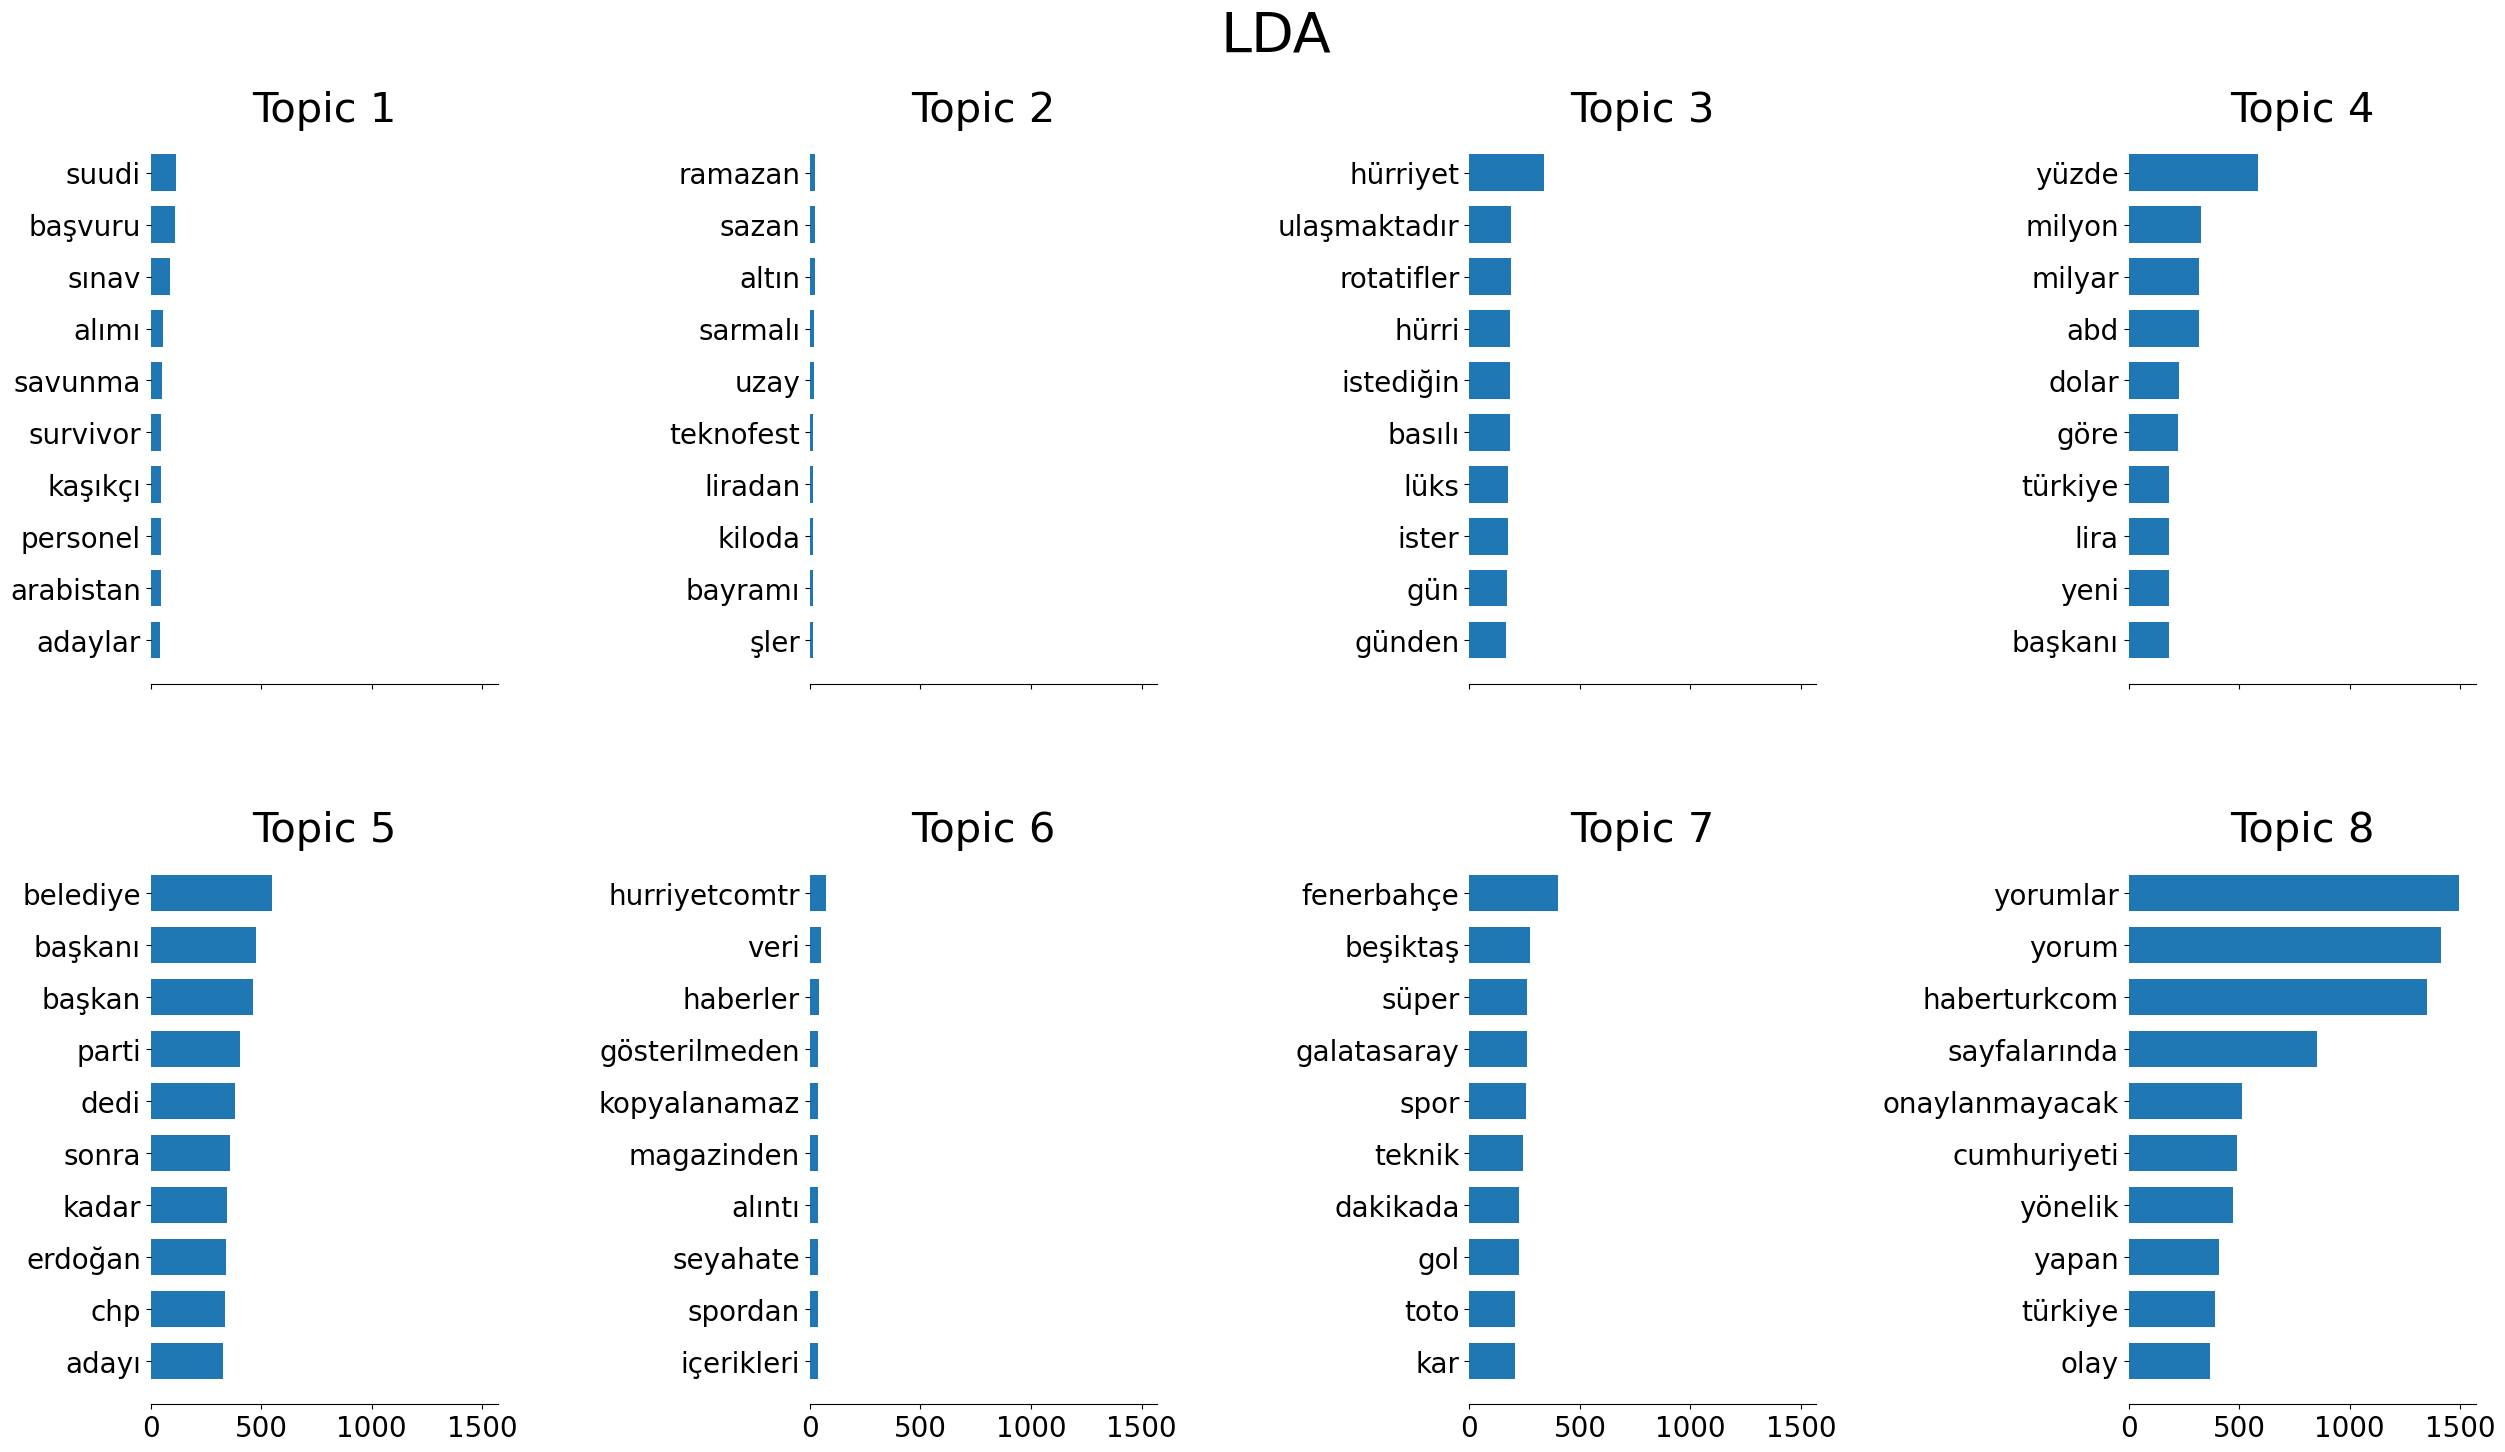

In [21]:
plot_top_words(lda, feature_names)


In [22]:
Z = lda.transform(X)

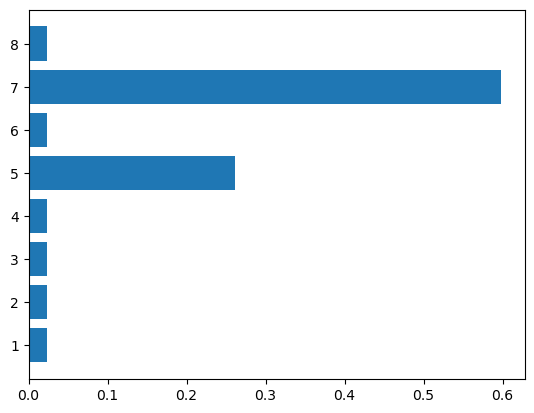

In [23]:
i = np.random.choice(len(df))
doc = Z[i]
topics = np.arange(8) + 1

fig, ax = plt.subplots()
ax.barh(topics, doc)
ax.set_yticks(topics)
plt.show()

In [24]:
df.iloc[i]["clean"]

'güncelleme tarihi devre arasında galatasarayın uzun uğraşlar sonrası kadrosuna kattığı mbaye diagne neymar mbappe isimleri sollamayı başardı galatasarayın yeni transferi mbaye diagne avrupanın yıldız isimlerini geride bırakmayı başardı'

In [26]:
# https://en.wikipedia.org/wiki/Kullback–Leibler_divergence iki olasılık dağılımı arasındaki farkı bulur
# mu: multiplicatie update: KLD için gerekli çözümleyici
nmf = NMF(n_components=8, beta_loss="kullback-leibler", solver="mu", random_state=42)

In [27]:
# 2 - 3 dk
nmf.fit(X)

NMF(beta_loss='kullback-leibler', n_components=8, random_state=42, solver='mu')

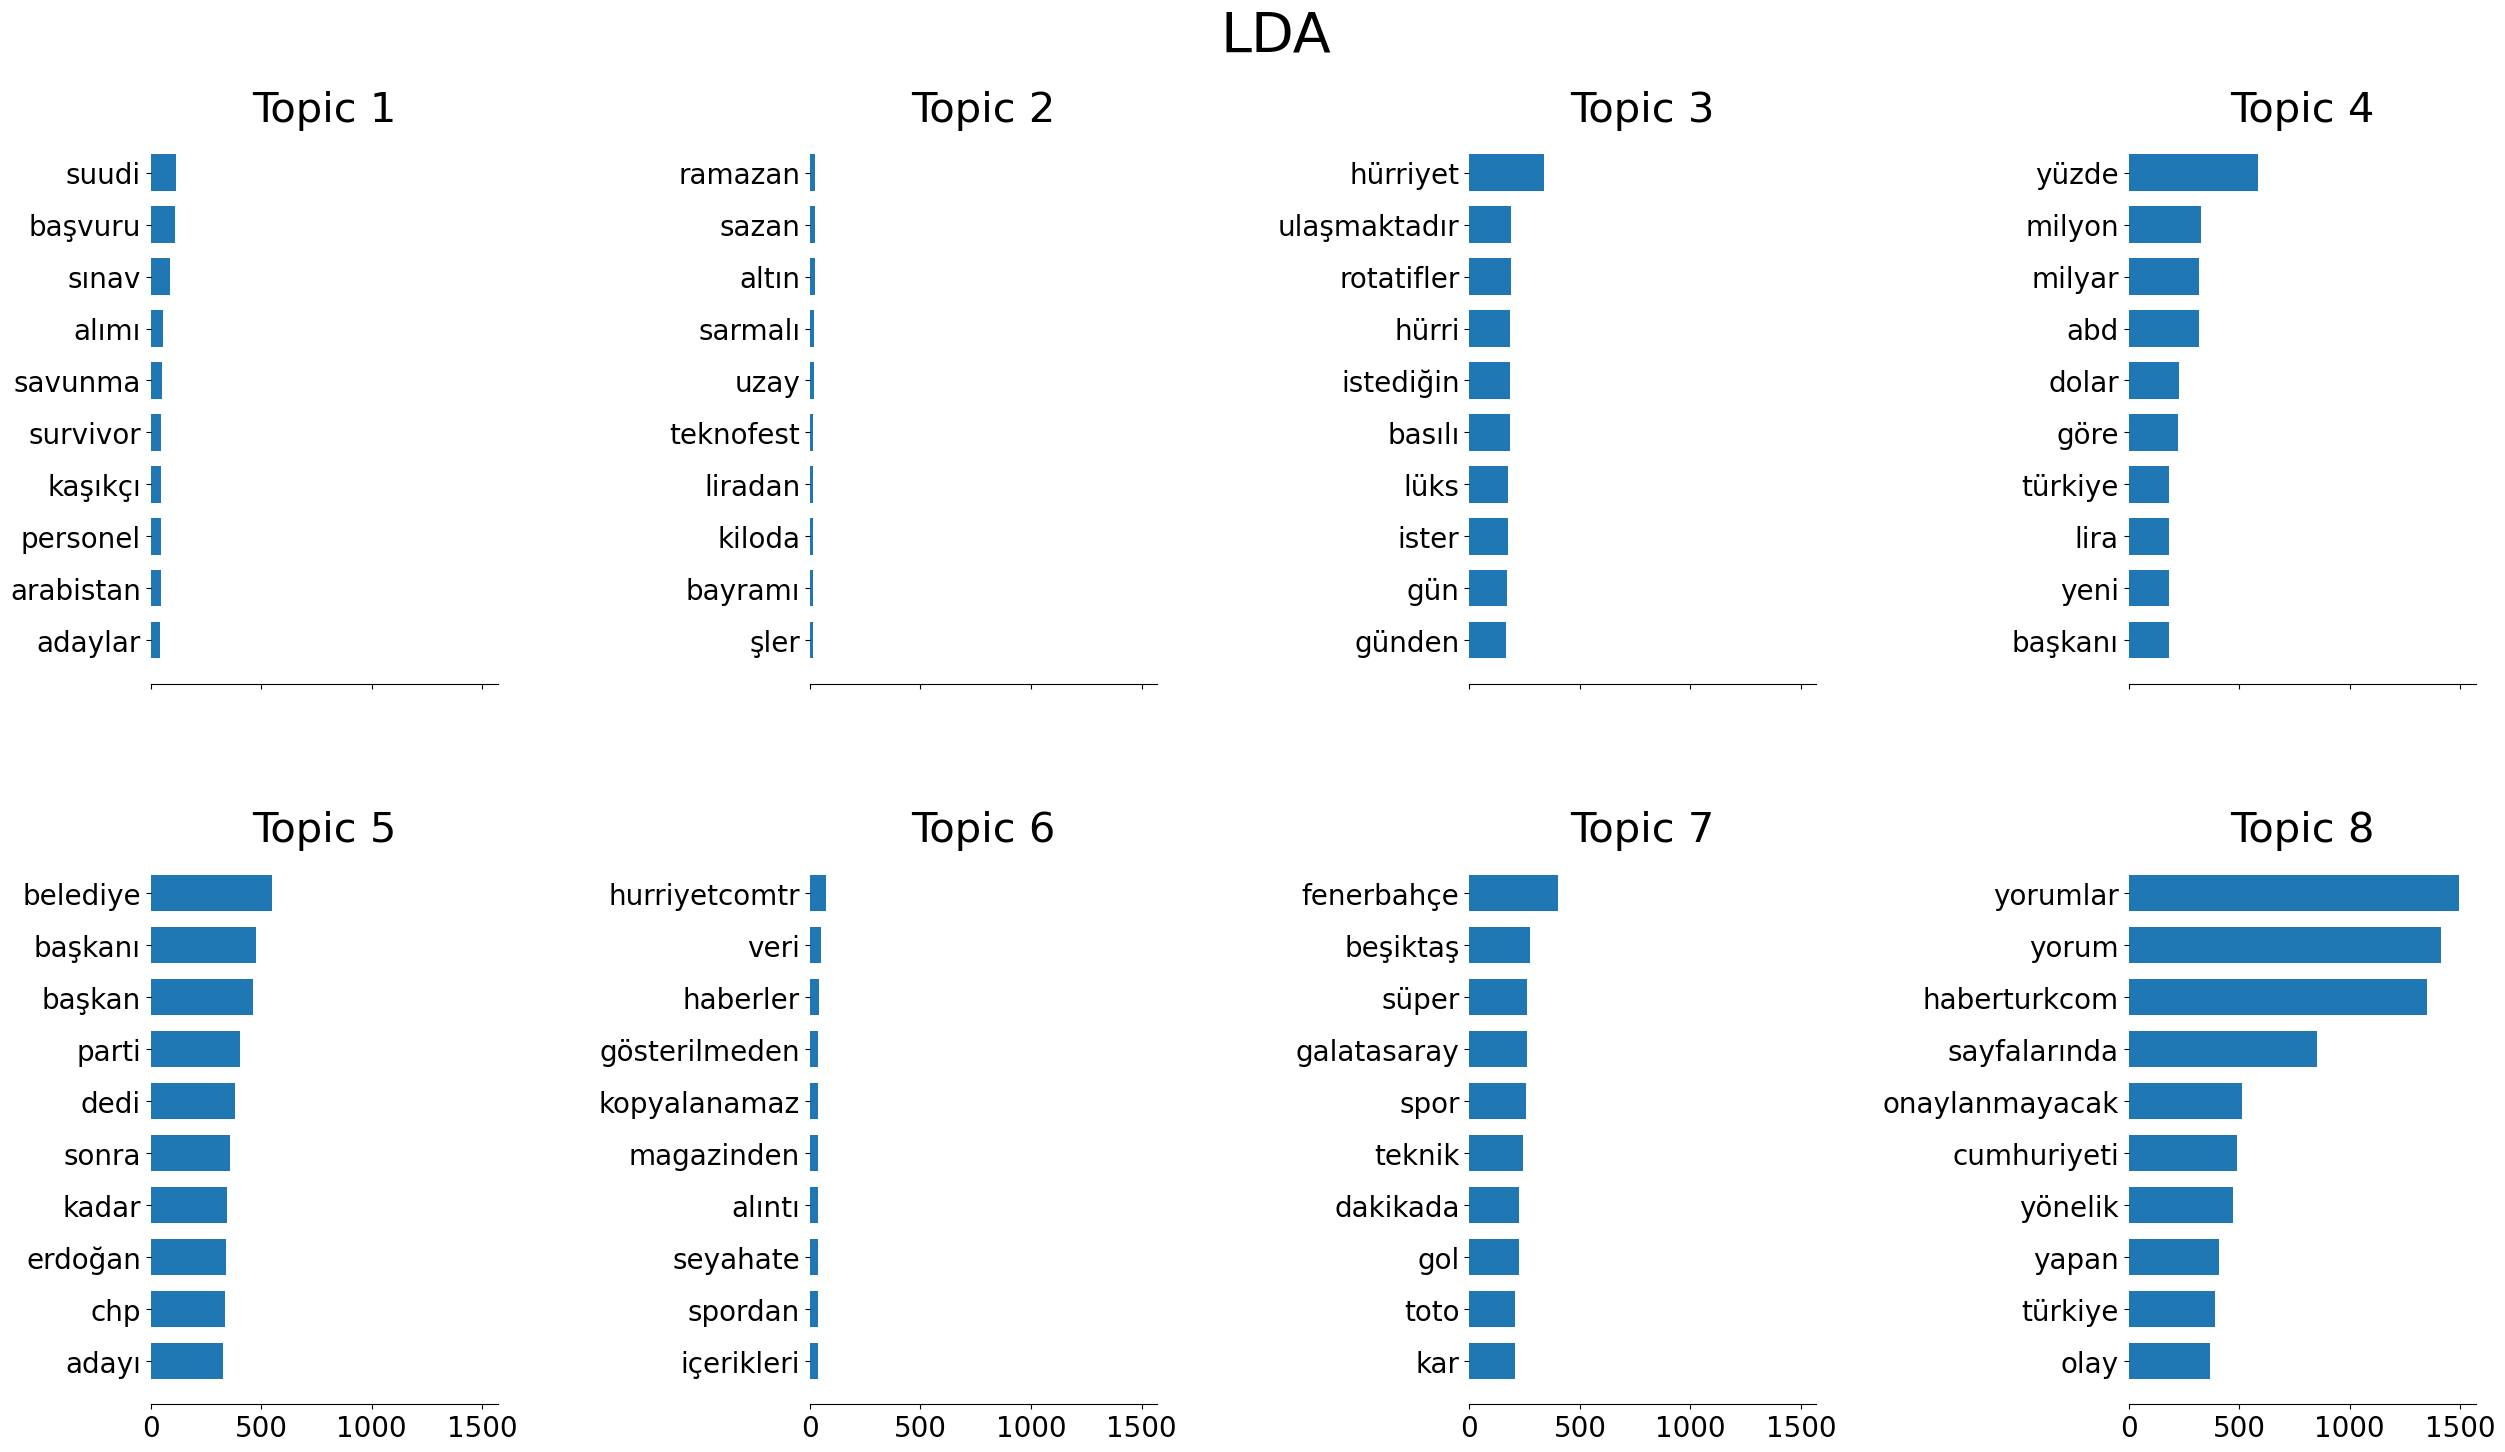

In [28]:
plot_top_words(lda, feature_names)

In [29]:
Z2 = nmf.transform(X)

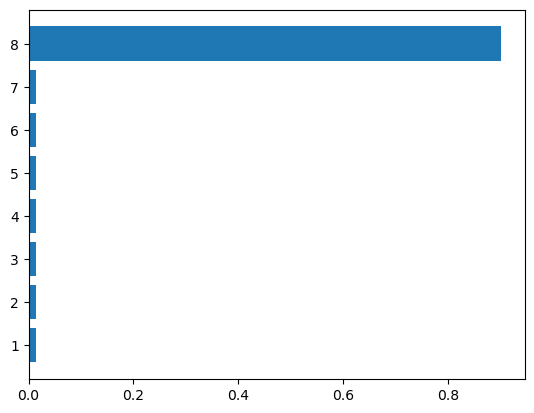

In [30]:
i = np.random.choice(len(df))
doc = Z[i]
topics = np.arange(8) + 1

fig, ax = plt.subplots()
ax.barh(topics, doc)
ax.set_yticks(topics)
plt.show()

In [31]:
df.iloc[i]["clean"]

'tekirdağda fetöpdy operasyonu gözaltı tekirdağın saray ilçesinde fetullahçı terör örgütüparalel devlet yapılanmasına fetöpdy yönelik soruşturma kapsamında kişi gözaltına alındı tekirdağ cumhuriyet başsavcılığınca yürütülen soruşturma kapsamında örgütle irtibatlı olduğu değerlendirilen şüpheliler i̇u ş ç hakkında yakalama kararı çıkarıldı şüpheliler i̇l emniyet müdürlüğü kaçakçılık organize suçlarla mücadele şube müdürlüğü ekiplerince gözaltına alındı şüphelilerden ş ç emniyetteki ifadelerinin ardından salıverildi i̇şlemleri tamamlanan adliyeye sevk edilen şüpheli savcılık sorgularının ardından serbest bırakıldı kaynak etiketler tekirdağ saray gözaltı fetö operasyon aşağıdaki kodu sitenize ekleyerek haberi paylaşabilirsiniz iframe srchttpswwwtrthabercomhabersiteneeklephpidresimbaslikspotdetaytarih width heightiframe türkiye son haberler'